## Download annotation files to new directory

Please see supplemental tables for location of annotation files.

## Intersect with annotations

### ENCODE cCREs (`v3` and `v4`), all biosamples, direction intersection

#### v3, Perturbed

In [3]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/encode.ccres.v3.hg38.bed \
-wa -u | wc -l 

6482


#### v3, Significant

In [4]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/encode.ccres.v3.hg38.bed \
-wa -u | wc -l

504


#### v4, Perturbed

In [5]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/encode.ccres.v4.hg38.bed.gz \
-wa -u | wc -l

11447


#### v4, Significant

In [6]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/encode.ccres.v4.hg38.bed.gz \
-wa -u | wc -l

608


#### v4, K562 cCREs, Perturbed

In [9]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.ccres.v4.hg38.bed.gz \
-wa -u | wc -l

11447


#### v4, K562 cCREs, Significant

In [10]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.ccres.v4.hg38.bed.gz \
-wa -u | wc -l

608


#### For v4, get the number of cCREs per region perturbed or significant

In [11]:
%%bash
module load bedtools2

bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.ccres.v4.hg38.bed.gz \
-c > k562meta/outs/binnedgenome.int.k562.elementReference.20230415.merge.int.k562cCREs.count.txt

In [12]:
%%bash
module load bedtools2

bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.ccres.v4.hg38.bed.gz \
-c > k562meta/outs/binnedgenome.int.k562.elementQuant.20230415.merge.int.k562cCREs.count.txt

#### Calculate percent of cCREs perturbed and percent of perturbed cCREs that overlapped a significant element

In [14]:
11447/2348854*100

0.48734404096636064

In [13]:
608/11447*100

5.311435310561719

#### Plot distribution of cCREs per perturbed and per significant element

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df1 = pd.read_csv('k562meta/outs/binnedgenome.int.k562.elementReference.20230415.merge.int.cCREs.count.txt',
                   sep='\t', header = None)

df1.columns = ['chr', 'start', 'end', 'cCRE_count']
df1['region_type'] = "perturbed"
df1.head()

,chr,start,end,cCRE_count,region_type
0,chr3,127573700,127574600,3,perturbed
1,chr3,127574700,127575600,4,perturbed
2,chr3,127584300,127585200,3,perturbed
3,chr3,127590100,127591500,6,perturbed
4,chr3,127595100,127596000,2,perturbed


In [18]:
df2 = pd.read_csv('k562meta/outs/binnedgenome.int.k562.elementQuant.20230415.merge.int.cCREs.count.txt',
                   sep='\t', header = None)

df2.columns = ['chr', 'start', 'end', 'cCRE_count']
df2['region_type'] = "significant"
df2.head()

,chr,start,end,cCRE_count,region_type
0,chr3,127672600,127673300,2,significant
1,chr3,128052000,128052600,3,significant
2,chr3,128426200,128427000,3,significant
3,chr3,128532800,128533400,1,significant
4,chr3,128649900,128650500,2,significant


In [19]:
plotdf = pd.concat([df1, df2], sort = False)
plotdf.head()

,chr,start,end,cCRE_count,region_type
0,chr3,127573700,127574600,3,perturbed
1,chr3,127574700,127575600,4,perturbed
2,chr3,127584300,127585200,3,perturbed
3,chr3,127590100,127591500,6,perturbed
4,chr3,127595100,127596000,2,perturbed


In [20]:
plotdf[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                                
                 count      mean        std  min  25%  50%  75%    max
region_type                                                           
perturbed       2733.0  4.207830  10.673580  0.0  1.0  2.0  4.0  236.0
significant      210.0  2.914286   2.089455  0.0  2.0  2.0  3.0   12.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b0107b7b9b0>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

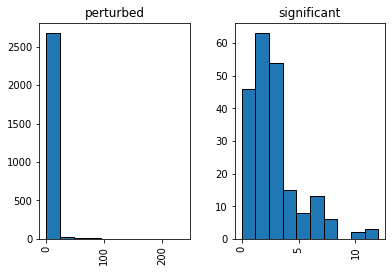

In [21]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf['cCRE_count'].hist(by=plotdf['region_type'], edgecolor='black') 

In [22]:
plotdf_sub = plotdf.loc[(plotdf["cCRE_count"] < 200)]
plotdf_sub.head()

,chr,start,end,cCRE_count,region_type
0,chr3,127573700,127574600,3,perturbed
1,chr3,127574700,127575600,4,perturbed
2,chr3,127584300,127585200,3,perturbed
3,chr3,127590100,127591500,6,perturbed
4,chr3,127595100,127596000,2,perturbed


In [23]:
plotdf_sub[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                               
                 count      mean       std  min  25%  50%  75%    max
region_type                                                          
perturbed       2732.0  4.122987  9.710128  0.0  1.0  2.0  4.0  147.0
significant      210.0  2.914286  2.089455  0.0  2.0  2.0  3.0   12.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b0109cc8ac8>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

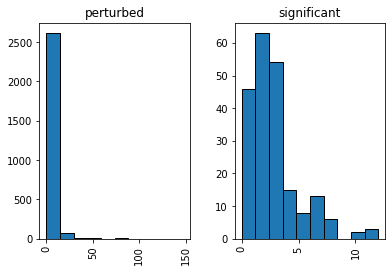

In [24]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf_sub['cCRE_count'].hist(by=plotdf_sub['region_type'], edgecolor='black') 

In [25]:
plotdf_sub = plotdf.loc[(plotdf["cCRE_count"] < 100)]
plotdf_sub.head()

,chr,start,end,cCRE_count,region_type
0,chr3,127573700,127574600,3,perturbed
1,chr3,127574700,127575600,4,perturbed
2,chr3,127584300,127585200,3,perturbed
3,chr3,127590100,127591500,6,perturbed
4,chr3,127595100,127596000,2,perturbed


In [26]:
plotdf_sub[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                              
                 count      mean       std  min  25%  50%  75%   max
region_type                                                         
perturbed       2723.0  3.744767  7.095331  0.0  1.0  2.0  4.0  91.0
significant      210.0  2.914286  2.089455  0.0  2.0  2.0  3.0  12.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b010a42d3c8>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

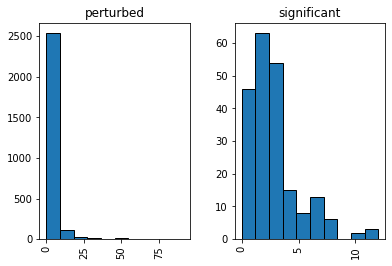

In [27]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf_sub['cCRE_count'].hist(by=plotdf_sub['region_type'], edgecolor='black') 

### ENCODE K562 cCREs (only `v4`), all biosamples, window +/- 100bp

#### v4, Perturbed

In [28]:
%%bash
module load bedtools2

bedtools window \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.ccres.v4.hg38.bed.gz \
-w 100 | wc -l

12000


#### v4, Significant

In [29]:
%%bash
module load bedtools2

bedtools window \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.ccres.v4.hg38.bed.gz \
-w 100 | wc -l

704


#### For v4, get the number of cCREs per region perturbed or significant

In [30]:
%%bash
module load bedtools2

bedtools window \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.ccres.v4.hg38.bed.gz \
-c -w 100 > k562meta/outs/binnedgenome.int.k562.elementReference.20230415.merge.window100.cCREs.count.txt

In [31]:
%%bash
module load bedtools2

bedtools window \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.ccres.v4.hg38.bed.gz \
-c -w 100 > k562meta/outs/binnedgenome.int.k562.elementQuant.20230415.merge.window100.cCREs.count.txt

#### Calculate percent of cCREs perturbed and percent of perturbed cCREs that overlapped a significant element

In [32]:
12000/2348854*100

0.5108874370224799

In [33]:
704/12000*100

5.866666666666666

#### Plot distribution of cCREs per perturbed and per significant element

In [34]:
df1 = pd.read_csv('k562meta/outs/binnedgenome.int.k562.elementReference.20230415.merge.window100.cCREs.count.txt',
                   sep='\t', header = None)

df1.columns = ['chr', 'start', 'end', 'cCRE_count']
df1['region_type'] = "perturbed"
df1.head()

,chr,start,end,cCRE_count,region_type
0,chr3,127573700,127574600,3,perturbed
1,chr3,127574700,127575600,4,perturbed
2,chr3,127584300,127585200,3,perturbed
3,chr3,127590100,127591500,6,perturbed
4,chr3,127595100,127596000,2,perturbed


In [35]:
df2 = pd.read_csv('k562meta/outs/binnedgenome.int.k562.elementQuant.20230415.merge.window100.cCREs.count.txt',
                   sep='\t', header = None)

df2.columns = ['chr', 'start', 'end', 'cCRE_count']
df2['region_type'] = "significant"
df2.head()

,chr,start,end,cCRE_count,region_type
0,chr3,127672600,127673300,3,significant
1,chr3,128052000,128052600,3,significant
2,chr3,128426200,128427000,4,significant
3,chr3,128532800,128533400,1,significant
4,chr3,128649900,128650500,3,significant


In [36]:
plotdf = pd.concat([df1, df2], sort = False)
plotdf.head()

,chr,start,end,cCRE_count,region_type
0,chr3,127573700,127574600,3,perturbed
1,chr3,127574700,127575600,4,perturbed
2,chr3,127584300,127585200,3,perturbed
3,chr3,127590100,127591500,6,perturbed
4,chr3,127595100,127596000,2,perturbed


In [37]:
plotdf[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                                
                 count      mean        std  min  25%  50%  75%    max
region_type                                                           
perturbed       2733.0  4.390779  10.690246  0.0  1.0  2.0  4.0  237.0
significant      210.0  3.352381   2.147574  0.0  2.0  3.0  4.0   13.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b010a51ddd8>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

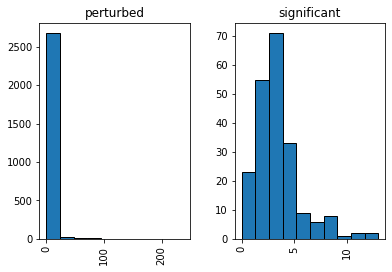

In [38]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf['cCRE_count'].hist(by=plotdf['region_type'], edgecolor='black') 

In [40]:
plotdf_sub = plotdf.loc[(plotdf["cCRE_count"] < 50)]
plotdf_sub.head()

,chr,start,end,cCRE_count,region_type
0,chr3,127573700,127574600,3,perturbed
1,chr3,127574700,127575600,4,perturbed
2,chr3,127584300,127585200,3,perturbed
3,chr3,127590100,127591500,6,perturbed
4,chr3,127595100,127596000,2,perturbed


In [41]:
plotdf_sub[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                              
                 count      mean       std  min  25%  50%  75%   max
region_type                                                         
perturbed       2705.0  3.502033  4.720997  0.0  1.0  2.0  4.0  49.0
significant      210.0  3.352381  2.147574  0.0  2.0  3.0  4.0  13.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b010a60ac88>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

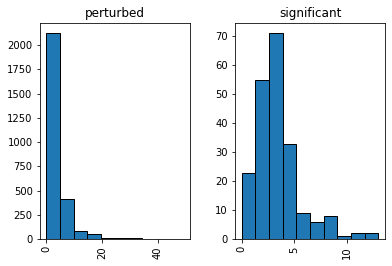

In [42]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf_sub['cCRE_count'].hist(by=plotdf_sub['region_type'], edgecolor='black') 

### Intersect with union DHSs

File downloaded 2022-04-30 from UCSC table browser. <br>
Notebook to prepare bed file: `20220430.encode.Figure1MetaAnalysis.AnnotationFiles.LRB`

In [ ]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/figure1meta/annotations
# gunzip wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz
# wc -l wgEncodeRegDnaseClustered.full.bed.hg38.bed
# gzip wgEncodeRegDnaseClustered.full.bed.hg38.bed

In [43]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-wa -u | wc -l

9709


In [44]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-wa -u | wc -l

460


In [45]:
9709/2153371*100

0.4508744661277597

In [46]:
460/13713*100

3.354481149274411

### Intersect with cell-type specific DHSs

In [49]:
# %%bash
# cd annotations
# cp annotationsk562.dnase.hg38.narrowPeak.bed.gz .
# cp annotationsk562.atacseq.pseudoreppeaks.hg38.narrowPeak.gz .

#### K562 DNase

In [50]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.dnase.hg38.narrowPeak.bed.gz \
-wa -u | wc -l

1527


In [51]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotationsk562.dnase.hg38.narrowPeak.bed.gz \
-wa -u | wc -l

261


In [107]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/annotations
# gunzip k562.dnase.hg38.narrowPeak.bed.gz
# wc -l k562.dnase.hg38.narrowPeak.bed
# gzip k562.dnase.hg38.narrowPeak.bed

In [52]:
### percent perturbed of all DNase peaks
1527/118721

0.01286208842580504

In [54]:
### percent DNase peaks perturbed that were significant
261/1527

0.17092337917485265

#### K562 ATAC-seq

In [110]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotationsk562.atacseq.pseudoreppeaks.hg38.narrowPeak.gz \
-wa -u | wc -l

2592


In [111]:
%%bash
module load bedtools2

bedtools intersect \
-b /data/gersbachlab/lrb53/encodeCrisprWG/figure1meta/released/outs/binnedgenome.int.SabetiEngreitz.elementQuant.20220523.hg38.bed \
-a annotationsk562.atacseq.pseudoreppeaks.hg38.narrowPeak.gz \
-wa -u | wc -l

432


In [112]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/annotations
# gunzip k562.atacseq.pseudoreppeaks.hg38.narrowPeak.gz
# wc -l k562.atacseq.pseudoreppeaks.hg38.narrowPeak
# gzip k562.atacseq.pseudoreppeaks.hg38.narrowPeak

In [132]:
### percent perturbed of all ATAC peaks
2592/203874

0.012713734953942141

In [133]:
### percent ATAC peaks perturbed that were significant
432/2592

0.16666666666666666

### 6. Cell-type specific H3K27ac peaks

#### K562s

Note: This is the only h3K27ac Histone ChIP dataset on the ENCODE portal but there is a warning for extremely low read depth. Was used in generating the v3 cCREs and is part of two reference epigenomes.

In [ ]:
# %%bash
# cd annotations
# wget -O k562.h3k27ac.peaks.hg38.narrowPeak.bed.gz https://www.encodeproject.org/files/ENCFF437DPT/@@download/ENCFF437DPT.bed.gz

In [57]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.h3k27ac.peaks.hg38.narrowPeak.bed.gz \
-wa -u | wc -l

1401


In [58]:
%%bash
module load bedtools2

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.h3k27ac.peaks.hg38.narrowPeak.bed.gz \
-wa -u | wc -l

234


In [118]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/annotations
# gunzip k562.h3k27ac.peaks.hg38.narrowPeak.bed.gz
# wc -l k562.h3k27ac.peaks.hg38.narrowPeak.bed
# gzip k562.h3k27ac.peaks.hg38.narrowPeak.bed

In [59]:
### percent perturbed of all h3k27ac peaks
1401/85357

0.016413416591492203

In [60]:
### percent h3k27ac peaks perturbed that were significant
234/1401

0.1670235546038544

### Write summary file for K562 features and for the entire compiled targeted regions.

Note: The counts here are for the total number of features in the annotation files.

In [136]:
# %%writefile /data/gersbachlab/lrb53/encodeCrisprWG/figure1meta/released/outs/SabetiEngreitz.elementReferenceAndQuant.modalityadjustment.summarymetrics.csv
# feature,pertubed,significant,total
# union_ccREs,6350,504,1063878
# K562_ccREs,5553,441,926535,
# union_DNase,9512,460,2113371,
# K562_DNase,1508,261,118721,
# K562_ATAC,2592,432,203874
# K562_H3K27ac,1382,234,85357,


Overwriting /data/gersbachlab/lrb53/encodeCrisprWG/figure1meta/released/outs/SabetiEngreitz.elementReferenceAndQuant.modalityadjustment.summarymetrics.csv


### Intersect significant and perturbed regions with K562 and `union` features

In [61]:
# %%bash
# mkdir -p k562meta/outs/upset

In [ ]:
# %%bash
# cd annotations

# wget -O k562.h3k4me1.pseudoreppeaks.hg38.narrowPeak.bed.gz https://www.encodeproject.org/files/ENCFF759NWD/@@download/ENCFF759NWD.bed.gz
# wget -O k562.h3k4me3.pseudoreppeaks.hg38.narrowPeak.bed.gz https://www.encodeproject.org/files/ENCFF885FQN/@@download/ENCFF885FQN.bed.gz
# wget -O k562.h3k9me3.reppeaks.hg38.narrowPeak.bed.gz https://www.encodeproject.org/files/ENCFF963GZJ/@@download/ENCFF963GZJ.bed.gz
# wget -O k562.h3k27me3.pseudoreppeaks.hg38.narrowPeak.bed.gz https://www.encodeproject.org/files/ENCFF801AHF/@@download/ENCFF801AHF.bed.gz
# wget -O k562.ep300.IDRpeaks.hg38.narrowPeak.bed.gz https://www.encodeproject.org/files/ENCFF702XPO/@@download/ENCFF702XPO.bed.gz
# wget -O k562.ctcf.IDRpeaks.hg38.narrowPeak.bed.gz https://www.encodeproject.org/files/ENCFF660GHM/@@download/ENCFF660GHM.bed.gz
# wget -O k562.polr2a.IDRpeaks.hg38.narrowPeak.bed.gz https://www.encodeproject.org/files/ENCFF355MNE/@@download/ENCFF355MNE.bed.gz

#### Significant CREs

In [66]:
%%bash
module load bedtools2

# input --> output description:
### for each intersection, the binned genome regions containing min. 1 perturbation are intersected with the feature of interest,
### then, the feature in 'a' (bin with overlap) is reported, with duplicates removed
### final output will contain a list of the regions containing perturbations that ALSO overlap a feature in the annotation
### each output will contain coordinates/regions from the initial bin set, not from the annotation files

cd k562meta/outs/upset

### All cCREs
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/encode.ccres.v4.hg38.bed.gz \
-wa -u > binned.k562.elementQuant.allccres.txt

### Union DHSs
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b /data/gersbachlab/lrb53/encodeCrisprWG/figure1meta/annotations/wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-wa -u > binned.k562.elementQuant.uniondnase.txt

### K562 ATAC
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.atacseq.pseudoreppeaks.hg38.narrowPeak.gz \
-wa -u > binned.k562.elementQuant.k562atac.txt

### K562 DNase
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.dnase.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementQuant.k562dnase.txt

### K562 cCREs
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.ccres.v4.hg38.bed.gz \
-wa -u > binned.k562.elementQuant.k562ccres.txt

### K562 H3K27ac
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.h3k27ac.peaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementQuant.k562h3k27ac.txt

### K562 H3K4me1
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.h3k4me1.pseudoreppeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementQuant.k562h3k4me1.txt

### K562 H3K4me3
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.h3k4me3.pseudoreppeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementQuant.k562h3k4me3.txt

### K562 H3K9me9
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.h3k9me3.reppeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementQuant.k562h3k9me3.txt

### K562 H3K27me3
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.h3k27me3.pseudoreppeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementQuant.k562h3k27me3.txt

### K562 EP300
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.ep300.IDRpeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementQuant.k562ep300.txt

### K562 CTCF
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.ctcf.IDRpeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementQuant.k562ctcf.txt

### K562 POLR2A
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.polr2a.IDRpeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementQuant.k562polr2a.txt



#### Perturbed regions

In [67]:
%%bash
module load bedtools2

# input --> output description:
### for each intersection, the binned genome regions containing min. 1 perturbation are intersected with the feature of interest,
### then, the feature in 'a' (bin with overlap) is reported, with duplicates removed
### final output will contain a list of the regions containing perturbations that ALSO overlap a feature in the annotation
### each output will contain coordinates/regions from the initial bin set, not from the annotation files

cd k562meta/outs/upset

### All cCREs
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/encode.ccres.v4.hg38.bed.gz \
-wa -u > binned.k562.elementReference.allccres.txt

### Union DHSs
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b /data/gersbachlab/lrb53/encodeCrisprWG/figure1meta/annotations/wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-wa -u > binned.k562.elementReference.uniondnase.txt

### K562 ATAC
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.atacseq.pseudoreppeaks.hg38.narrowPeak.gz \
-wa -u > binned.k562.elementReference.k562atac.txt

### K562 DNase
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.dnase.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementReference.k562dnase.txt

### K562 cCREs
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.ccres.v4.hg38.bed.gz \
-wa -u > binned.k562.elementReference.k562ccres.txt

### K562 H3K27ac
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.h3k27ac.peaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementReference.k562h3k27ac.txt

### K562 H3K4me1
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.h3k4me1.pseudoreppeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementReference.k562h3k4me1.txt

### K562 H3K4me3
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.h3k4me3.pseudoreppeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementReference.k562h3k4me3.txt

### K562 H3K9me9
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.h3k9me3.reppeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementReference.k562h3k9me3.txt

### K562 H3K27me3
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.h3k27me3.pseudoreppeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementReference.k562h3k27me3.txt

### K562 EP300
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.ep300.IDRpeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementReference.k562ep300.txt

### K562 CTCF
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.ctcf.IDRpeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementReference.k562ctcf.txt

### K562 POLR2A
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.polr2a.IDRpeaks.hg38.narrowPeak.bed.gz \
-wa -u > binned.k562.elementReference.k562polr2a.txt



### Compare signal between perturbed, significant regions

#### Download bigWig files, then convert to bedGraph

In [ ]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/annotations
# wget https://www.encodeproject.org/files/ENCFF849TDM/@@download/ENCFF849TDM.bigWig -O k562.h3k27ac.foldchange.bigWig
# wget https://www.encodeproject.org/files/ENCFF754EAC/@@download/ENCFF754EAC.bigWig -O k562.atac.foldchange.bigWig
# wget https://www.encodeproject.org/files/ENCFF972GVB/@@download/ENCFF972GVB.bigWig -O k562.dnase.foldchange.bigWig

In [7]:
%%bash
# cd /data/gersbachlab/Software/
# chmod a+x bigWigToBedGraph

# ./bigWigToBedGraph annotations/k562.h3k27ac.foldchange.bigWig annotations/k562.h3k27ac.foldchange.bdg
# ./bigWigToBedGraph annotations/k562.atac.foldchange.bigWig annotations/k562.atac.foldchange.bdg
# ./bigWigToBedGraph annotations/k562.dnase.foldchange.bigWig annotations/k562.dnase.foldchange.bdg


In [70]:
%%bash
cd annotations/
cp /data/gersbachlab/lrb53/encodeCrisprWG/annotations/*.bdg .
ls

encode.ccres.v3.hg38.bed
encode.ccres.v4.hg38.bed.gz
k562.atac.foldchange.bdg
k562.atacseq.pseudoreppeaks.hg38.narrowPeak.gz
k562.ccres.v4.hg38.bed.gz
k562.ctcf.foldchange.bdg
k562.ctcf.IDRpeaks.hg38.narrowPeak.bed.gz
k562.dnase.foldchange.bdg
k562.dnase.hg38.narrowPeak.bed.gz
k562.ep300.foldchange.bdg
k562.ep300.IDRpeaks.hg38.narrowPeak.bed.gz
k562.h3k27ac.foldchange.bdg
k562.h3k27ac.peaks.hg38.narrowPeak.bed.gz
k562.h3k27me3.foldchange.bdg
k562.h3k27me3.pseudoreppeaks.hg38.narrowPeak.bed.gz
k562.h3k4me1.foldchange.bdg
k562.h3k4me1.pseudoreppeaks.hg38.narrowPeak.bed.gz
k562.h3k4me3.foldchange.bdg
k562.h3k4me3.pseudoreppeaks.hg38.narrowPeak.bed.gz
k562.h3k9me3.foldchange.bdg
k562.h3k9me3.reppeaks.hg38.narrowPeak.bed.gz
k562.polr2a.foldchange.bdg
k562.polr2a.IDRpeaks.hg38.narrowPeak.bed.gz
wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz


In [72]:
%%bash
head annotations/k562.h3k27ac.foldchange.bdg -n 1
head annotations/k562.atac.foldchange.bdg -n 1
head annotations/k562.dnase.foldchange.bdg -n 1

chr1	0	10020	0
chr1	0	9914	0
chr1	0	13260	0


### Intersect with region bdg files, save output (make plots in R)

#### Significant CREs

In [73]:
%%bash
mkdir -p k562meta/outs/comparesignal

In [1]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.atac.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.atac.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.atac.foldchange.txt -n 1

chr11	5248799	5248801	0.66783	chr11	5248800	5249100


In [2]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.dnase.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.dnase.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.dnase.foldchange.txt -n 1

chr11	5248800	5248820	0.00914174	chr11	5248800	5249100


In [3]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.h3k27ac.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.h3k27ac.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.h3k27ac.foldchange.txt -n 1

chr11	5248787	5248807	9.73495	chr11	5248800	5249100


In [4]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.h3k4me1.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.h3k4me1.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.h3k4me1.foldchange.txt -n 1

chr11	5248793	5248802	0.48902	chr11	5248800	5249100


In [5]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.h3k4me3.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.h3k4me3.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.h3k4me3.foldchange.txt -n 1

chr11	5248789	5248801	10.4145	chr11	5248800	5249100


In [6]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.h3k9me3.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.h3k9me3.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.h3k9me3.foldchange.txt -n 1

chr11	5248787	5248820	0.30212	chr11	5248800	5249100


In [7]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.h3k27me3.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.h3k27me3.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.h3k27me3.foldchange.txt -n 1

chr11	5248788	5248805	0.53727	chr11	5248800	5249100


In [8]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.ep300.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.ep300.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.ep300.foldchange.txt -n 1

chr11	5248772	5248805	1.75008	chr11	5248800	5249100


In [9]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.ctcf.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.ctcf.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.ctcf.foldchange.txt -n 1

chr11	5248778	5248837	0.26093	chr11	5248800	5249100


In [1]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.polr2a.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.polr2a.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.polr2a.foldchange.txt -n 1

chr11	5248800	5248802	2.32402	chr11	5248800	5249100


In [2]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-a annotations/k562.polr2a.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementQuant.int.k562.polr2a.foldchange.txt

head binnedgenome.int.k562.elementQuant.int.k562.polr2a.foldchange.txt -n 1

chr11	5248800	5248802	2.32402	chr11	5248800	5249100


#### Perturbed regions

In [3]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.atac.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.atac.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.atac.foldchange.txt -n 1

chr11	4091699	4091701	0.2404	chr11	4091700	4092700


In [4]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.dnase.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.dnase.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.dnase.foldchange.txt -n 1

chr11	4091700	4091740	0.0883702	chr11	4091700	4092700


In [5]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.h3k27ac.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.h3k27ac.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.h3k27ac.foldchange.txt -n 1

chr11	4091696	4091752	4.11177	chr11	4091700	4092700


In [6]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.h3k4me1.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.h3k4me1.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.h3k4me1.foldchange.txt -n 1

chr11	4091695	4091706	8.59226	chr11	4091700	4092700


In [7]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.h3k4me3.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.h3k4me3.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.h3k4me3.foldchange.txt -n 1

chr11	4091695	4091709	0.90235	chr11	4091700	4092700


In [8]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.h3k9me3.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.h3k9me3.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.h3k9me3.foldchange.txt -n 1

chr11	4091576	4091769	0	chr11	4091700	4092700


In [9]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.h3k27me3.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.h3k27me3.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.h3k27me3.foldchange.txt -n 1

chr11	4091659	4091709	1.09414	chr11	4091700	4092700


In [10]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.ep300.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.ep300.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.ep300.foldchange.txt -n 1

chr11	4091663	4091705	1.41227	chr11	4091700	4092700


In [11]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.ctcf.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.ctcf.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.ctcf.foldchange.txt -n 1

chr11	4091683	4091740	1.26327	chr11	4091700	4092700


In [12]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.polr2a.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.polr2a.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.polr2a.foldchange.txt -n 1

chr11	4091694	4091701	1.40654	chr11	4091700	4092700


In [13]:
%%bash
module load bedtools2

cd k562meta/outs/comparesignal

bedtools intersect \
-b k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-a annotations/k562.polr2a.foldchange.bdg \
-wa -wb > binnedgenome.int.k562.elementReference.int.k562.polr2a.foldchange.txt

head binnedgenome.int.k562.elementReference.int.k562.polr2a.foldchange.txt -n 1

chr11	4091694	4091701	1.40654	chr11	4091700	4092700


### Download eRNA peak calls and repeat bedtools intersection

#### K562 RAMPAGE data

In [30]:
# %%bash
# cd annotations

# wget -O k562.rampage.idrpeak.hg38.bed.gz https://www.encodeproject.org/files/ENCFF069ZON/@@download/ENCFF069ZON.bed.gz

#### Intersect elementQuant and elementReference with IDR peaks

In [5]:
%%bash
module load bedtools2

cd k562meta/outs/upset

### elementQuant
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.rampage.idrpeak.hg38.bed.gz \
-wa -u > binned.k562.elementQuant.k562rampage.txt

wc -l binned.k562.elementQuant.k562rampage.txt

### elementReference
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.rampage.idrpeak.hg38.bed.gz \
-wa -u > binned.k562.elementReference.k562rampage.txt

wc -l binned.k562.elementReference.k562rampage.txt


44 binned.k562.elementQuant.k562rampage.txt
142 binned.k562.elementReference.k562rampage.txt


### CAGE analysis

In [ ]:
# %%bash
# cd annotations

# wget -O k562.cage.idrpeak.hg38.bed.gz https://www.encodeproject.org/files/ENCFF698DQS/@@download/ENCFF698DQS.bed.gz

#### Intersect elementQuant and elementReference with IDR peaks

In [6]:
%%bash
module load bedtools2

cd k562meta/outs/upset

### elementQuant
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.cage.idrpeak.hg38.bed.gz \
-wa -u > binned.k562.elementQuant.k562cage.txt

wc -l binned.k562.elementQuant.k562cage.txt

### elementReference
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.cage.idrpeak.hg38.bed.gz \
-wa -u > binned.k562.elementReference.k562cage.txt

wc -l binned.k562.elementReference.k562cage.txt


54 binned.k562.elementQuant.k562cage.txt
143 binned.k562.elementReference.k562cage.txt


### K562 GRO-CAP

In [ ]:
# %%bash
# cd annotations

# ## GRO-CAP (capped) bidrectional peaks
# wget -O k562.grocap.capped.bidirectionalpeaks.hg38.bed.gz  https://www.encodeproject.org/files/ENCFF156JSS/@@download/ENCFF156JSS.bed.gz

#### Intersect elementQuant and elementReference with IDR peaks

In [7]:
%%bash
module load bedtools2

cd k562meta/outs/upset

### elementQuant
bedtools intersect \
-a k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed \
-b annotations/k562.grocap.capped.bidirectionalpeaks.hg38.bed.gz \
-wa -u > binned.k562.elementQuant.k562grocap.capped.txt

wc -l binned.k562.elementQuant.k562grocap.capped.txt

### elementReference
bedtools intersect \
-a k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed \
-b annotations/k562.grocap.capped.bidirectionalpeaks.hg38.bed.gz \
-wa -u > binned.k562.elementReference.k562grocap.capped.txt

wc -l binned.k562.elementReference.k562grocap.capped.txt


124 binned.k562.elementQuant.k562grocap.capped.txt
422 binned.k562.elementReference.k562grocap.capped.txt
